<a href="https://colab.research.google.com/github/yahya-ansariii/depression/blob/master/Depression_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Import and first look

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
df = pd.read_csv("depression_dataset_reddit.csv")

In [34]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [36]:
df.describe(include = 'all')

,clean_text,is_depression
count,7731,7731.000000
unique,7650,NaN
top,i want to be dead ive been suicidal for year i...,NaN
freq,8,NaN
mean,NaN,0.495537
std,NaN,0.500012
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [37]:
df.isnull().sum()

clean_text       0
is_depression    0
dtype: int64

In [38]:
df.is_depression.value_counts()

0    3900
1    3831
Name: is_depression, dtype: int64

<Axes: ylabel='is_depression'>

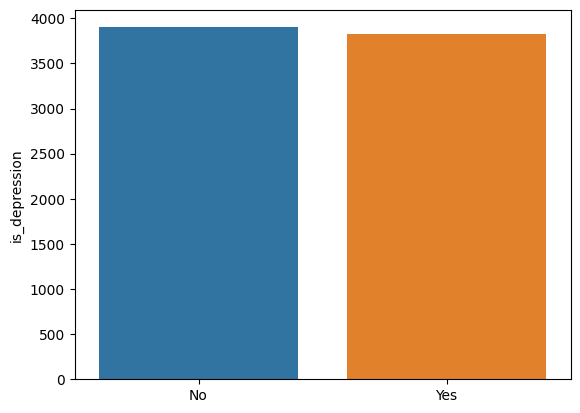

In [39]:
sns.barplot(data = df, x = ['No', 'Yes'], y = df.is_depression.value_counts())

### WordCloud Visualization

In [40]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

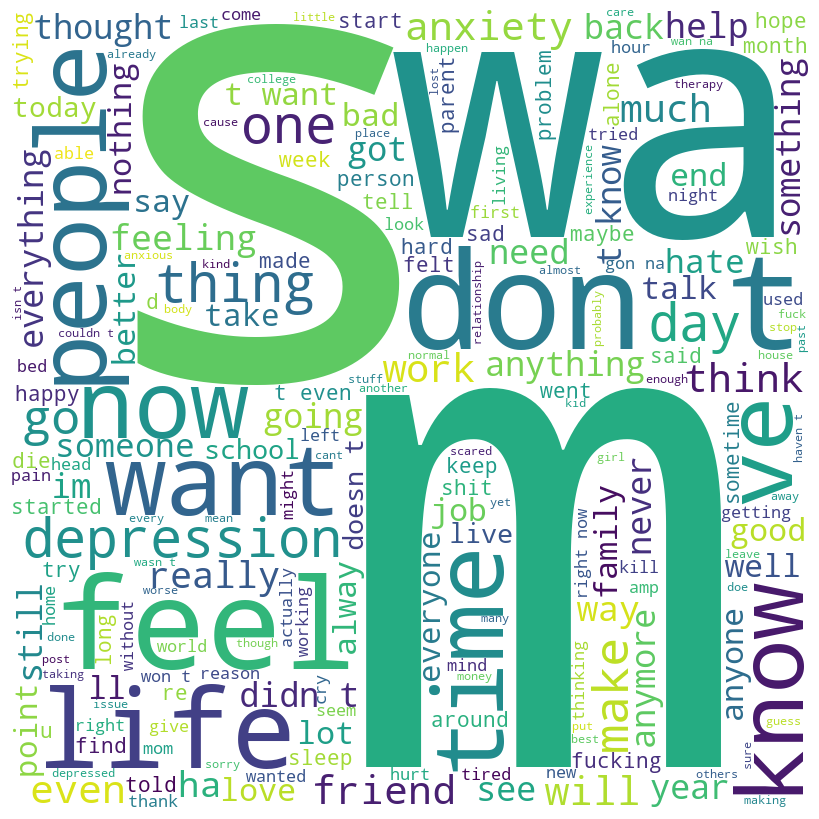

In [41]:
from wordcloud import WordCloud
comment_words = ''

# iterate through the csv file
for val in df.clean_text:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [42]:
df.clean_text[0]

'we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat

### Tokenization

In [43]:
df

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [44]:
from nltk.tokenize import word_tokenize

In [45]:
# Function to tokenize text
def tokenize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    return tokens

In [46]:
# Apply tokenization to the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(tokenize_text)

### Removing stopwords

In [47]:
# nltk stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saite\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# Function to remove stopwords
def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text if word.lower() not in stopwords]

  return text


In [49]:
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [50]:
df.head()

,clean_text,is_depression
0,"[understand, people, reply, immediately, op, i...",1
1,"[welcome, r, depression, check, post, place, t...",1
2,"[anyone, else, instead, sleeping, depressed, s...",1
3,"[kind, stuffed, around, lot, life, delaying, i...",1
4,"[sleep, greatest, comforting, escape, whenever...",1


### Applying Lemmatization

In [51]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# Function to perform lemmatization on a text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatize each word
    return " ".join(lemmatized_text)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saite\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saite\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
# Apply lemmatization to the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(lemmatize_text)

In [53]:
df.head()

,clean_text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1


### Train Test Split

In [54]:
X = df['clean_text']
y = df['is_depression']

In [55]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697)

### TFIDF

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Model Training

### Model Function

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report




from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [58]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [59]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

### ML Model - 1 : Logistic Regression

In [60]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# model is trained (fit ) and predicted in the evaluate model


Train ROC AUC: 0.9700247774501666
Test ROC AUC: 0.9496336261649752


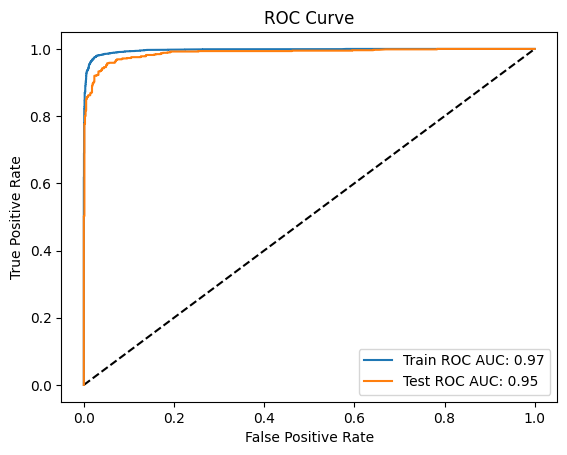


Confusion Matrix:


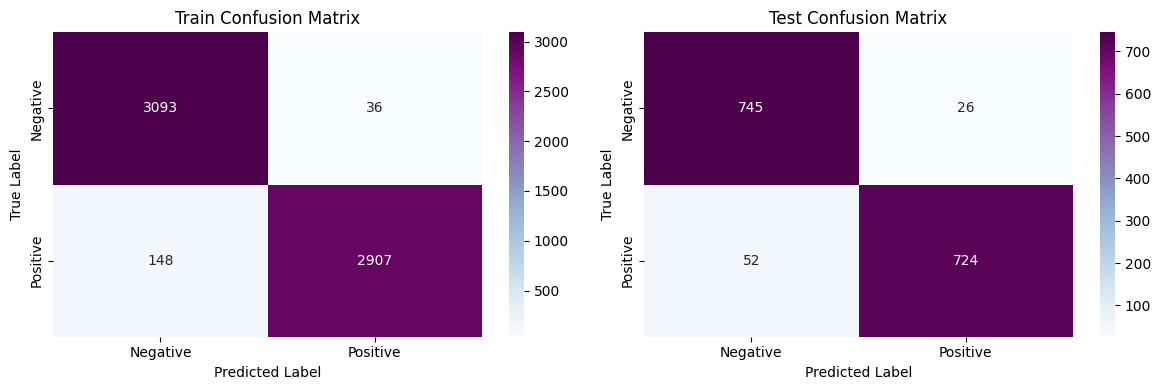


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.954335 | 0.988495 |   0.971115 | 3129        |
| 1            |    0.987768 | 0.951555 |   0.969323 | 3055        |
| accuracy     |    0.970246 | 0.970246 |   0.970246 |    0.970246 |
| macro avg    |    0.971051 | 0.970025 |   0.970219 | 6184        |
| weighted avg |    0.970851 | 0.970246 |   0.97023  | 6184        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.934755 | 0.966278 |   0.950255 |  771       |
| 1            |    0.965333 | 0.93299  |   0.948886 |  776       |
| accuracy     |    0.94958  | 0.94958  |   0.94958  |    0.94958 |
| macro avg    |    0.950044 | 0.949634 |   0.949571 | 1547       |
| weighted avg |    0.950094 | 0.94958  |   0.9495

In [62]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [63]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.970851
Precision Test,0.950094
Recall Train,0.970246
Recall Test,0.949580
Accuracy Train,0.970246
Accuracy Test,0.949580
ROC-AUC Train,0.970025
ROC-AUC Test,0.949634
F1 macro Train,0.970230
F1 macro Test,0.949568


### ML Model - 2 : Random Forest

In [64]:
# Initialize the model
rf = RandomForestClassifier(random_state=0)


Train ROC AUC: 0.9993453355155483
Test ROC AUC: 0.9567964686375975


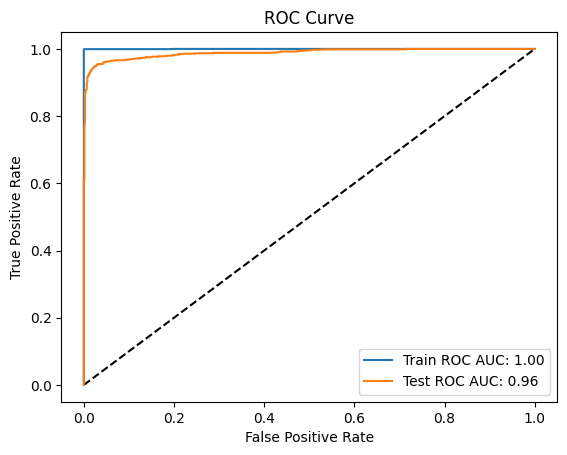


Confusion Matrix:


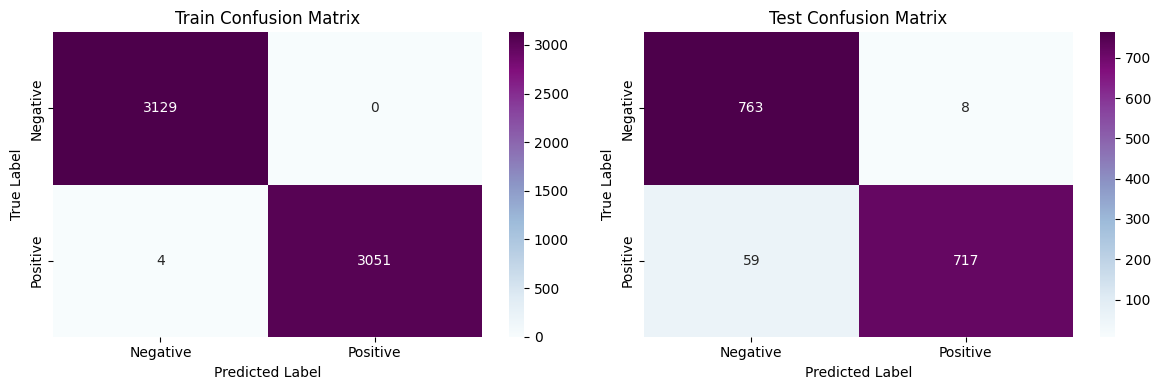


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.998723 | 1        |   0.999361 | 3129        |
| 1            |    1        | 0.998691 |   0.999345 | 3055        |
| accuracy     |    0.999353 | 0.999353 |   0.999353 |    0.999353 |
| macro avg    |    0.999362 | 0.999345 |   0.999353 | 6184        |
| weighted avg |    0.999354 | 0.999353 |   0.999353 | 6184        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.928224 | 0.989624 |   0.957941 |  771       |
| 1            |    0.988966 | 0.923969 |   0.955363 |  776       |
| accuracy     |    0.95669  | 0.95669  |   0.95669  |    0.95669 |
| macro avg    |    0.958595 | 0.956796 |   0.956652 | 1547       |
| weighted avg |    0.958693 | 0.95669  |   0.9566

In [65]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [ ]:
score['Random Forest'] = rf_score
score

,Logistic regression,Random Forest
Precision Train,0.973535,0.999838
Precision Test,0.954511,0.962749
Recall Train,0.972671,0.999838
Recall Test,0.954105,0.960569
Accuracy Train,0.972671,0.999838
Accuracy Test,0.954105,0.960569
ROC-AUC Train,0.972410,0.999836
ROC-AUC Test,0.954152,0.960679
F1 macro Train,0.972652,0.999838
F1 macro Test,0.954097,0.960527


### ML Model - 3 : SVM (Support Vector Machine)

In [66]:
# Initialize the model
svm = SVC(kernel='linear', random_state=0, probability=True)


Train ROC AUC: 0.9846966684607696
Test ROC AUC: 0.95480080094134


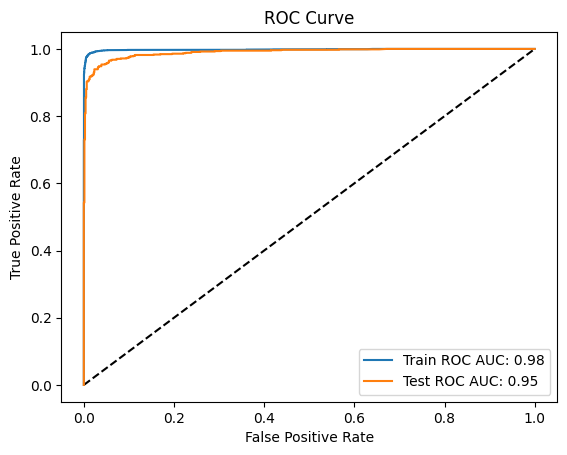


Confusion Matrix:


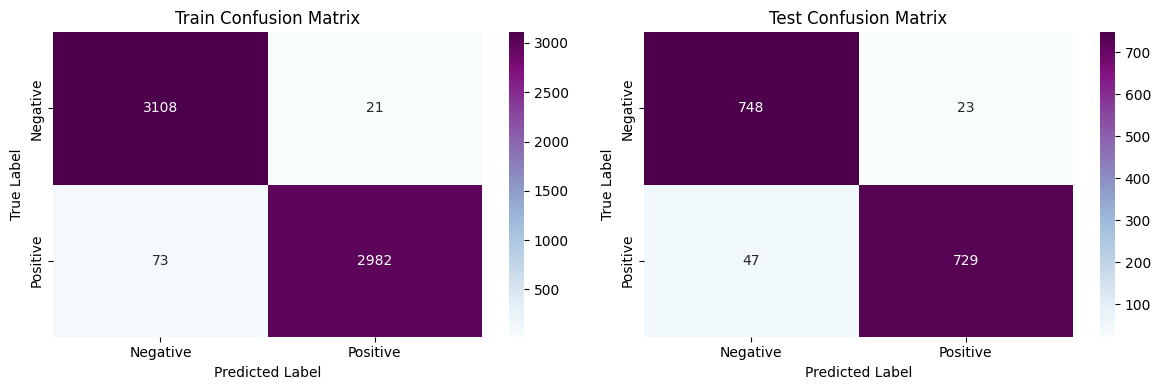


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.977051 | 0.993289 |   0.985103 | 3129        |
| 1            |    0.993007 | 0.976105 |   0.984483 | 3055        |
| accuracy     |    0.984799 | 0.984799 |   0.984799 |    0.984799 |
| macro avg    |    0.985029 | 0.984697 |   0.984793 | 6184        |
| weighted avg |    0.984934 | 0.984799 |   0.984797 | 6184        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.940881 | 0.970169 |   0.9553   |  771        |
| 1            |    0.969415 | 0.939433 |   0.954188 |  776        |
| accuracy     |    0.954751 | 0.954751 |   0.954751 |    0.954751 |
| macro avg    |    0.955148 | 0.954801 |   0.954744 | 1547        |
| weighted avg |    0.955194 | 0.954751 |   

In [67]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [ ]:
score['SVM'] = svm_score
score

,Logistic regression,Random Forest,SVM
Precision Train,0.973535,0.999838,0.985509
Precision Test,0.954511,0.962749,0.957535
Recall Train,0.972671,0.999838,0.985285
Recall Test,0.954105,0.960569,0.957337
Accuracy Train,0.972671,0.999838,0.985285
Accuracy Test,0.954105,0.960569,0.957337
ROC-AUC Train,0.972410,0.999836,0.985153
ROC-AUC Test,0.954152,0.960679,0.957370
F1 macro Train,0.972652,0.999838,0.985281
F1 macro Test,0.954097,0.960527,0.957334


### ML Model - 4 : Naive Bayes

In [ ]:
# Initiate model
naive = MultinomialNB()


Train ROC AUC: 0.9314604572922436
Test ROC AUC: 0.8911132616631233


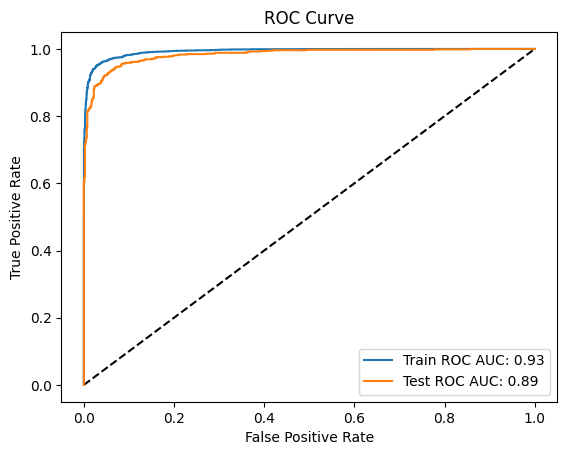


Confusion Matrix:


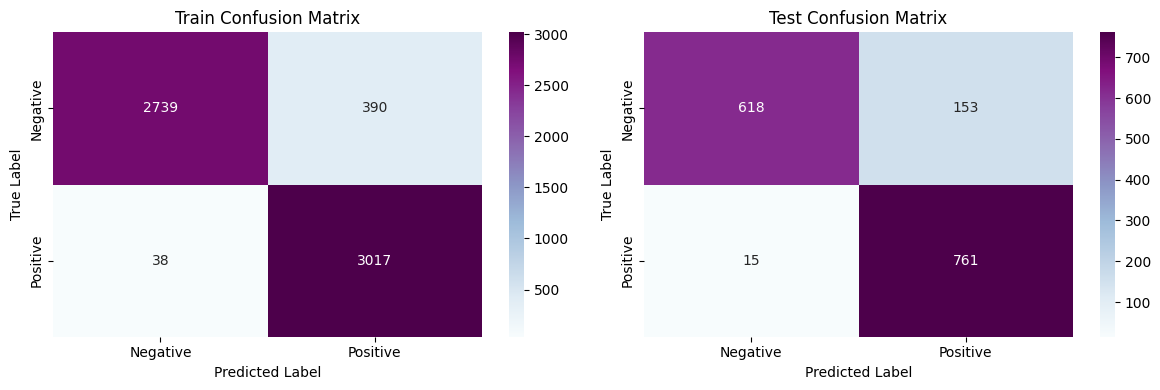


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.986316 | 0.87536  |   0.927531 | 3129        |
| 1            |    0.88553  | 0.987561 |   0.933767 | 3055        |
| accuracy     |    0.930789 | 0.930789 |   0.930789 |    0.930789 |
| macro avg    |    0.935923 | 0.93146  |   0.930649 | 6184        |
| weighted avg |    0.936526 | 0.930789 |   0.930612 | 6184        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.976303 | 0.801556 |   0.880342 |  771        |
| 1            |    0.832604 | 0.98067  |   0.900592 |  776        |
| accuracy     |    0.891403 | 0.891403 |   0.891403 |    0.891403 |
| macro avg    |    0.904454 | 0.891113 |   0.890467 | 1547        |
| weighted avg |    0.904221 | 0.891403 |   

In [ ]:
# Visualizing evaluation Metric Score chart
naive_score = evaluate_model(naive, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [72]:
naive_score = 0  # or some other default value
score['Naive Bayes'] = naive_score
score

,Logistic regression,Naive Bayes
Precision Train,0.970851,0
Precision Test,0.950094,0
Recall Train,0.970246,0
Recall Test,0.949580,0
Accuracy Train,0.970246,0
Accuracy Test,0.949580,0
ROC-AUC Train,0.970025,0
ROC-AUC Test,0.949634,0
F1 macro Train,0.970230,0
F1 macro Test,0.949568,0


### ML Model - 5 : Xtreme Gradient Boosting

In [74]:
# Initialize the model
xgb_model = xgb.XGBClassifier()


Train ROC AUC: 0.9818369312157689
Test ROC AUC: 0.9554660235067591


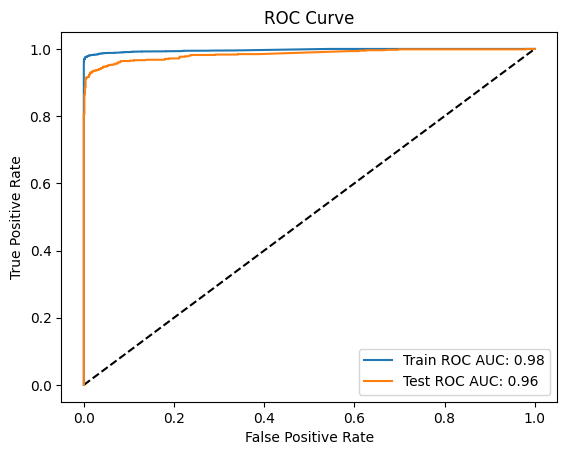


Confusion Matrix:


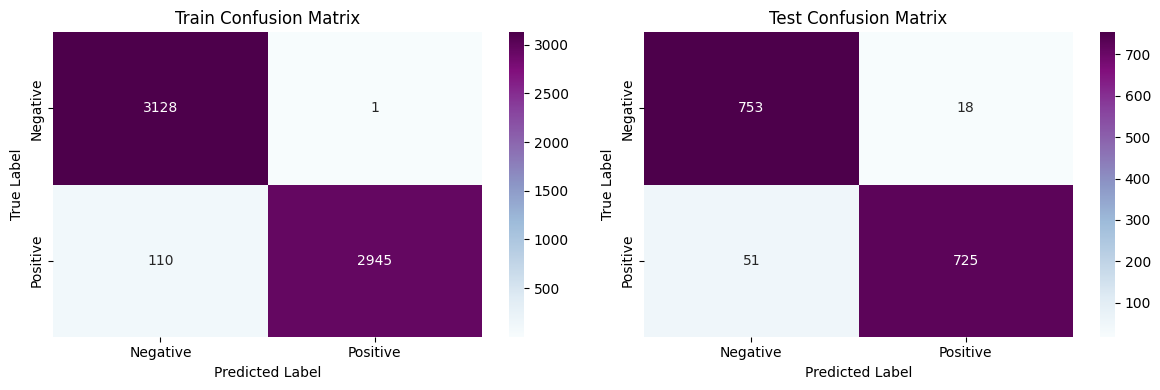


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.966028 | 0.99968  |   0.982566 | 3129       |
| 1            |    0.999661 | 0.963993 |   0.981503 | 3055       |
| accuracy     |    0.98205  | 0.98205  |   0.98205  |    0.98205 |
| macro avg    |    0.982844 | 0.981837 |   0.982035 | 6184       |
| weighted avg |    0.982643 | 0.98205  |   0.982041 | 6184       |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.936567 | 0.976654 |   0.95619  |  771        |
| 1            |    0.975774 | 0.934278 |   0.954575 |  776        |
| accuracy     |    0.955398 | 0.955398 |   0.955398 |    0.955398 |
| macro avg    |    0.956171 | 0.955466 |   0.955383 | 1547        |
| weighted avg |    0.956234 | 0.955398 |   0.95538

In [75]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [76]:
score['XGB'] = xgb_score
score

,Logistic regression,Naive Bayes,XGB
Precision Train,0.970851,0,0.982643
Precision Test,0.950094,0,0.956234
Recall Train,0.970246,0,0.982050
Recall Test,0.949580,0,0.955398
Accuracy Train,0.970246,0,0.982050
Accuracy Test,0.949580,0,0.955398
ROC-AUC Train,0.970025,0,0.981837
ROC-AUC Test,0.949634,0,0.955466
F1 macro Train,0.970230,0,0.982041
F1 macro Test,0.949568,0,0.955380


### Best model selection

In [77]:
score

,Logistic regression,Naive Bayes,XGB
Precision Train,0.970851,0,0.982643
Precision Test,0.950094,0,0.956234
Recall Train,0.970246,0,0.982050
Recall Test,0.949580,0,0.955398
Accuracy Train,0.970246,0,0.982050
Accuracy Test,0.949580,0,0.955398
ROC-AUC Train,0.970025,0,0.981837
ROC-AUC Test,0.949634,0,0.955466
F1 macro Train,0.970230,0,0.982041
F1 macro Test,0.949568,0,0.955380


In [78]:
# Removing the overfitted models which have recall, rocauc, f1 for train as 1
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.99].index  #creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['ROC-AUC Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     #creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,ROC-AUC Train,ROC-AUC Test,F1 macro Train,F1 macro Test
Logistic regression,0.970851,0.950094,0.970246,0.949580,0.970246,0.949580,0.970025,0.949634,0.970230,0.949568
Naive Bayes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XGB,0.982643,0.956234,0.982050,0.955398,0.982050,0.955398,0.981837,0.955466,0.982041,0.955380


In [79]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [80]:
metrics = ['Precision','Recall', 'Accuracy', 'ROC-AUC', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: XGB - 0.9562
Recall: XGB - 0.9554
Accuracy: XGB - 0.9554
ROC-AUC: XGB - 0.9555
F1 macro: XGB - 0.9554


## Pickling model to deploy

In [81]:
# Import pickle
import pickle

# Save the best model (naive bayes tuned)
pickle.dump(svm, open('svm.pkl', 'wb'))
# Save the tfidf_vectorizer
pickle.dump(tfidf_vectorizer, open('tfidf.pkl', 'wb'))

## Merged test data to check on deployed model. (this is unseen data for the model)

In [82]:
testing = pd.DataFrame(data = zip(X_test, y_test))

In [83]:
testing

,0,1
0,theekween depression anxiety heart break thelm...,1
1,twittera que muera,0
2,rlly hope someone understands return school ne...,1
3,completely wiped reloaded 900 lost bbm contact...,0
4,latexfetish sadly feed wordpress feed usually ...,0
...,...,...
1542,anxiety worst experience date happened couple ...,1
1543,kal penn confusing hour life,0
1544,duckling famous child book stolen boston publi...,0
1545,hmm shoulder making bad noise move arm back fo...,0


In [84]:
# data with label 1
testing[testing[1] == 1]

,0,1
0,theekween depression anxiety heart break thelm...,1
2,rlly hope someone understands return school ne...,1
5,possibility people effective placebo effect ta...,1
8,also anxiety post groove depression yho ha sana,1
12,man neighborhood killed method planning happen...,1
...,...,...
1532,graduated long ago work experience find job lo...,1
1533,get argument mum almost everyday reason intend...,1
1537,seems need revise plan especially date plan ev...,1
1542,anxiety worst experience date happened couple ...,1


In [85]:
# getting text to test for 1 as prediction
testing[testing[1] == 1].loc[1533][0]

'get argument mum almost everyday reason intend start fight always manage mum ha tolerance stress sensitive argument ha lot dad hate admit like around family younger sister even like live house toxic behaviour inability communicate properly never wanted hurt anyone become thorn hurting seen decline time much severe thing home mum ha damaged much stress forced stay bed rest day argument unfolds wont long ha heart attack stress unless something change go friend month quiet never trouble caused able break reality hour go home face stress home drive insane hate around people get along never wanted way made like peace im asleep alone outside mate thats enough keep going past year changed much know anymore become emotionless hollow building pain sadness inside showing anyone except friend tip iceberg never wanted bad guy end one mistake make handle stress either might even finish school yet reach college help either want go college mum kick house go live dad ha severely affected mentally dru

In [86]:
# getting text to test for 1 as prediction
testing[testing[1] == 1].loc[12][0]

'man neighborhood killed method planning happened month ago got detail today mom suspect thing story heard something like happens people rally together happen mom talked poor wife much kid going miss must medication wa say thing wa sad mental health issue people circle think people like worth le someone healthy never said tell think people like hard love many demon inside u people depression letting devil get none ha escaped really evil letting devil win worst part know planning could never say anything want hurt want destroy image alive'

In [87]:
# data with label 0
testing[testing[1] == 0]

,0,1
1,twittera que muera,0
3,completely wiped reloaded 900 lost bbm contact...,0
4,latexfetish sadly feed wordpress feed usually ...,0
6,logging need study,0
7,jessdubb lmao u may wait another season come t...,0
...,...,...
1540,leeds festival twitter man ha lied update,0
1541,bed trying helplessly breathe nose without com...,0
1543,kal penn confusing hour life,0
1544,duckling famous child book stolen boston publi...,0


In [88]:
# getting text to test for 0 as prediction
testing[testing[1] == 0].loc[1545][0]

'hmm shoulder making bad noise move arm back forth know fear return physio may required'

In [89]:
# getting text to test for 0 as prediction
testing[testing[1] == 0].loc[989][0]

'friend coco chris party weekend seemed awesome fail wasnae'